### Treść zadania

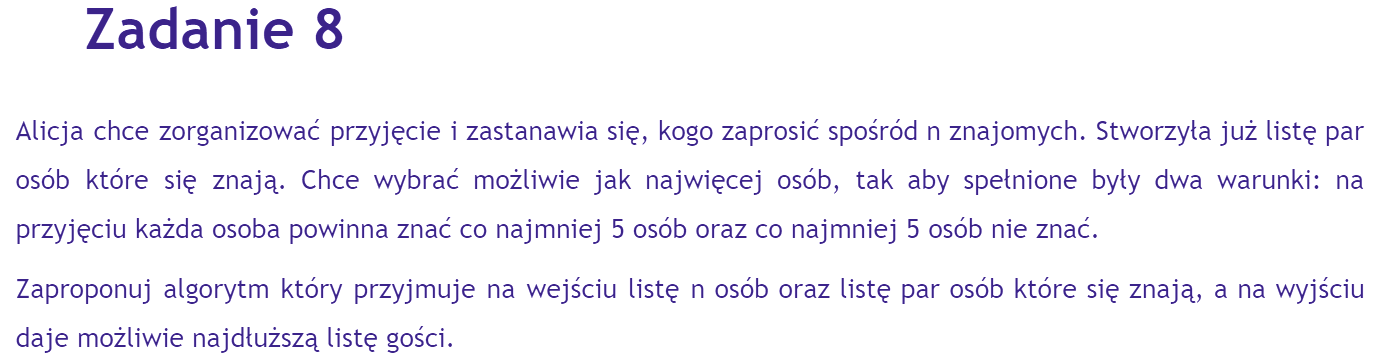

### Złożoność

###### Obliczeniowa:
$ O(n^2) $ - Bo w najgorszym przypadku usuwamy każdego ze znajomych Alicji i przyjęcie nie może się odbyć, przy postawionych warunkach. Wówczas dla każdego ze znajomych musimy sprawdzać wszystkich jego znajomych, których jest $ n $, stąd $ n \cdot n = n^2 $.
###### Pamięciowa:
$ O(n^2) $ - Bo tablica znajomości, jaką tworzymy, ma rozmiar $ n^2 $.

### Implementacja

In [1]:
def party(friends: 'array of firends pairs', n: 'number of friends'):
    if n < 10: return []
    # Create matrix representing relations (assume everybody is invited at the party
    # at the beginning)
    K = [[False] * n for _ in range(n)]
    T = [0] * n      # Array of numbers of people which the i-th person knows
    F = [0] * n      # Array of numbers of people which the i-th person doesn't know
    V = [True] * n   # Array which indicates who will be invited
    for f1, f2 in friends:
        K[f1][f2] = K[f2][f1] = True
    # Count how many other invited people does the current person know or doesn't know
    for i in range(n):
        for j in range(n):
            if i == j: continue
            if K[i][j]:
                T[i] += 1
            else:
                F[i] += 1
    # Start removing people from the party who don't have a desired number of friends
    # who were invited at the party
    to_remove = []
    for i in range(n):
        if T[i] < 5 or F[i] < 5:
            to_remove.append(i)
            V[i] = False
    # Remove people till there are some remaining to remove
    while to_remove:
        i = to_remove.pop()
        # Update all the other people
        for j in range(n):
            # Skip if checking the same person or a person was already marked not to be invited
            if i == j or not V[j]: continue
            # If a person removed knows another person, decrease a number of people known by
            # the other person
            if K[i][j]:
                T[j] -= 1
                if T[j] < 5:
                    to_remove.append(j)
                    V[j] = False
            # Else, decrease a number of people at the party who aren't known by the person j
            else:
                F[j] -= 1
                if F[j] < 5:
                    to_remove.append(j)
                    V[j] = False
    # Get a list op people invited
    res = [i for i in range(n) if V[i]]
    
    print(*(list(map(int, row)) for row in K), sep='\n')
    print('known', T)
    print('not  ', F)
    print('inv  ', V)
    
    return res

###### Kilka testów

In [2]:
import random

def random_frineds(n):
    pairs = []
    for i in range(n - 1):
        possible = list(range(i + 1, n))
        for _ in range(random.randint(1, len(possible))):
            friend = random.choice(possible)
            possible.remove(friend)
            pairs.append((i, friend))
    return pairs

In [3]:
n = 25
friends = random_frineds(n)

print(friends)
print(party(friends, n))

[(0, 4), (0, 10), (0, 16), (0, 1), (0, 5), (0, 6), (0, 21), (0, 9), (0, 18), (0, 11), (0, 23), (0, 24), (0, 15), (0, 3), (0, 8), (0, 17), (0, 14), (0, 20), (0, 12), (0, 19), (0, 2), (0, 7), (1, 17), (1, 24), (1, 10), (1, 2), (2, 9), (2, 20), (2, 10), (2, 3), (2, 14), (2, 8), (2, 13), (2, 5), (2, 15), (2, 21), (2, 22), (2, 7), (2, 11), (2, 6), (2, 16), (2, 24), (2, 23), (2, 4), (2, 12), (2, 17), (2, 19), (2, 18), (3, 19), (3, 21), (3, 17), (3, 15), (3, 14), (3, 6), (3, 7), (3, 11), (3, 4), (3, 10), (3, 20), (3, 22), (3, 18), (3, 16), (3, 13), (3, 9), (3, 24), (3, 23), (4, 10), (4, 7), (4, 14), (4, 11), (4, 19), (4, 15), (4, 5), (4, 13), (4, 9), (4, 21), (4, 22), (4, 20), (4, 16), (4, 12), (4, 18), (4, 8), (4, 24), (4, 6), (4, 17), (5, 23), (5, 16), (5, 7), (5, 18), (5, 11), (5, 13), (5, 6), (6, 9), (6, 13), (6, 19), (6, 21), (7, 24), (7, 10), (7, 16), (7, 18), (7, 22), (7, 15), (7, 21), (7, 14), (7, 8), (7, 9), (7, 23), (7, 17), (7, 13), (7, 19), (7, 12), (7, 20), (8, 20), (8, 23), (8, 

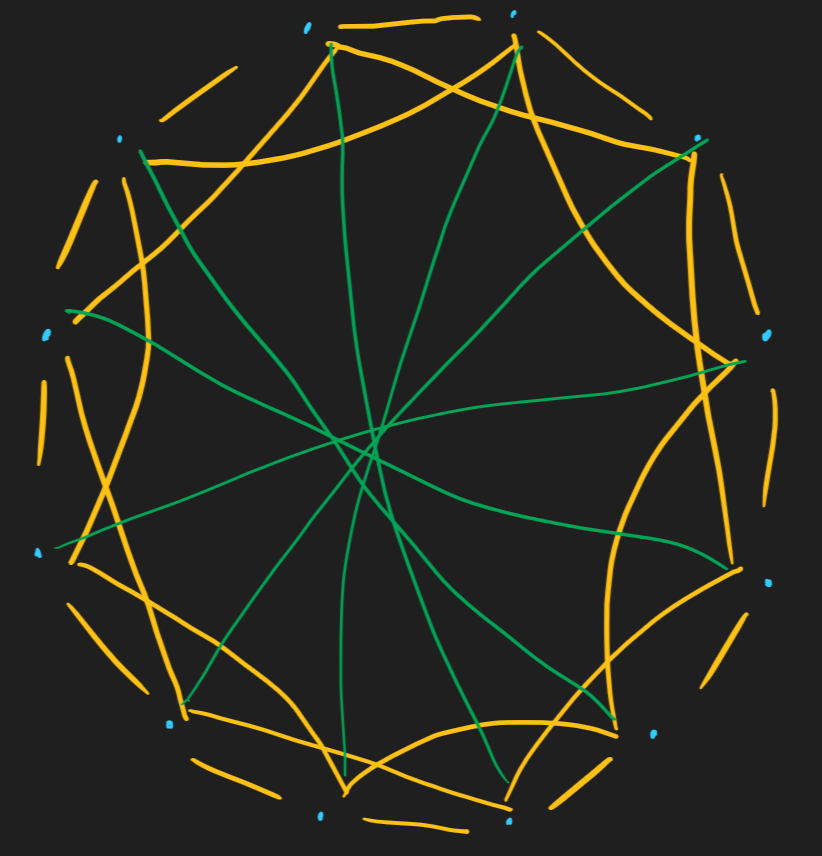

In [4]:
n = 12
friends = [v for i in range(n) for v in [(i, (i + 1) % n), (i, (i - 1) % n), (i, (i + 2) % n), (i, (i - 2) % n), (i, (i + n // 2) % n)]]

print(friends)
print(party(friends, n))

[(0, 1), (0, 11), (0, 2), (0, 10), (0, 6), (1, 2), (1, 0), (1, 3), (1, 11), (1, 7), (2, 3), (2, 1), (2, 4), (2, 0), (2, 8), (3, 4), (3, 2), (3, 5), (3, 1), (3, 9), (4, 5), (4, 3), (4, 6), (4, 2), (4, 10), (5, 6), (5, 4), (5, 7), (5, 3), (5, 11), (6, 7), (6, 5), (6, 8), (6, 4), (6, 0), (7, 8), (7, 6), (7, 9), (7, 5), (7, 1), (8, 9), (8, 7), (8, 10), (8, 6), (8, 2), (9, 10), (9, 8), (9, 11), (9, 7), (9, 3), (10, 11), (10, 9), (10, 0), (10, 8), (10, 4), (11, 0), (11, 10), (11, 1), (11, 9), (11, 5)]
[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]
known [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
not   [6, 6,